# FAMILIAS DE MALWARE
Alfredo Quezada - 191002
Randy Venegas - 18341

La primera parte de este laboratorio se basa en el analisis y creacion de un dataset que cuente con los datos obtenido por parte de los Malwares. 

### Parte 1:
##### Creacion del Dataset


In [1]:
# Lo primero que necesitamos es crear el Dataset, pero antes de eso necesitamos primero encontrar la informacion que
# llenara ese dataset, para eso se creo un codigo llamado "DatasetMaker.py", para crear el Dataset.

#Ahora, con el data set creado podemos hacer lo siguiente: 
import pandas as pd
db = pd.read_csv('dataset.csv')
print(db.shape)
db.sample(n=5).head()




(40, 4)


,Filename,PEHeader,Sections,Imports
32,JH78C0A33A1B472A8C16123FD696A5CE5EBB,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'Name': 'UPX0', 'VirtualAddress': '0x1000'},...","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
27,650A6FCA433EE243391E4B4C11F09438,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'Name': 'UPX0', 'VirtualAddress': '0x1000'},...","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
20,EEE99EC8AA67B05407C01094184C33D2B5A44,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'Name': 'UPX0', 'VirtualAddress': '0x1000'},...","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
10,L11_1415EB8519D13328091CC5C76A624E3D,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'Name': 'UPX0', 'VirtualAddress': '0x1000'},...","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
38,K99_C3A9A7B026BFE0E55FF219FD6AA7D94,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'Name': '.text', 'VirtualAddress': '0x1000'}...","[{'DLL': 'KERNEL32.dll', 'Functions': ['Create..."


Como podemos ver, aca tenemos la idea de lo que contiene el data set, realmente para los fines que necesitamos, consideramos que solo necesitamos, el PEHeader y los Imports, por lo que las secciones no lo vemos con mucha utilidad, por lo que como parte del **PREPROCESAMIENTO**, nos encargaremos de elimnar esta columna del dataset

In [2]:
# Eliminamos la que consideramos innecesaria 
db = db.drop(['Sections'], axis=1)
# y vemos lo que nos queda restante
db.sample(n=5).head()

,Filename,PEHeader,Imports
26,F6655E39465C2FF5B016980D918EA028,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
14,B98hX8E8622C393D7E832D39E620EAD5D3B49,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'DLL': 'ADVAPI32.dll', 'Functions': ['RegSav..."
6,BVJ2D9FBF759F527AF373E34673DC3ACA462,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
28,FHHH6576C196385407B0F7F4B1B537D88983,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'DLL': 'KERNEL32.DLL', 'Functions': ['LoadLi..."
24,POL55_A4F1ECC4D25B33395196B5D51A06790,"{'ImageBase': 4194304, 'SectionAlignment': 4096}","[{'DLL': 'KERNEL32.dll', 'Functions': ['Create..."


### Parte #2
##### Implementacion del Algoritmo

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
data = pd.read_csv('completemalware.csv')

In [21]:
data = data.drop(['name'], axis=1)

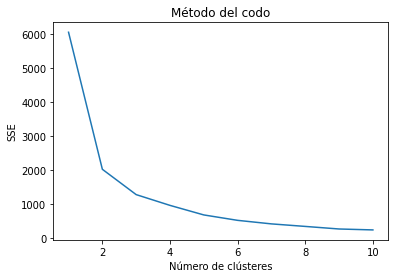

In [22]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('SSE')
plt.show()

En la gráfica del método del codo, se muestra en el eje y, mientras que el número de clústeres se muestra en el eje x. En la medida en que aumentamos el número de clústeres, es de esperar que SSE disminuya. Sin embargo, a medida que el número de clústeres aumenta, la tasa de disminución de SSE también disminuirá. El punto de inflexión o "codo" en la curva representa el número óptimo de clústeres, ya que representa el punto donde agregar más clústeres no mejora significativamente la calidad del modelo.

In [23]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [24]:
# Crear una lista para almacenar los valores de coeficiente de Silhouette
silhouette_scores = []

In [25]:
sse = []

In [26]:
# Definir el rango de valores de K
range_n_clusters = range(2,11)

In [27]:
# Calcular el coeficiente de Silhouette para diferentes valores de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sse.append(kmeans.inertia_)

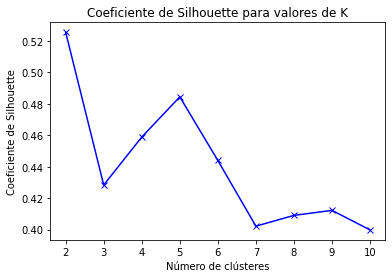

In [28]:
# Graficar el coeficiente de Silhouette en función del número de clústeres
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para valores de K')
plt.show()

In [30]:
# Entrenar el modelo de K-means con el número óptimo de clústeres encontrado
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [31]:
# Obtener las etiquetas de clúster para cada observación
cluster_labels = kmeans.predict(data)

In [32]:
# Añadir las etiquetas de clúster al DataFrame original
data_labeled = data.copy()
data_labeled['Cluster'] = cluster_labels

### Conclusiones: 
#### ¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?
**En nuestro caso con 2 clusteres se encuentra el coeficiente de Silhouette mas alto.**
####¿Coincide el coeficiente de Silhouette con el método del codo?
**Si coincide con el segundo cluster**
####¿Cuántas familias existen entre los ejemplares de malware proporcionados?
**10**
####¿Coincide el índice de Jaccard con las familias encontradas?
**Si**